### Column Description
1. sku – Random ID for the product
2. national_inv – Current inventory level for the part
3. lead_time – Transit time for product (if available)
4. in_transit_qty – Amount of product in transit from source
5. forecast_3_month – Forecast sales for the next 3 months
6. forecast_6_month – Forecast sales for the next 6 months
7. forecast_9_month – Forecast sales for the next 9 months
8. sales_1_month – Sales quantity for the prior 1 month time period
9. sales_3_month – Sales quantity for the prior 3 month time period
10. sales_6_month – Sales quantity for the prior 6 month time period
11. sales_9_month – Sales quantity for the prior 9 month time period
12. min_bank – Minimum recommend amount to stock
13. potential_issue – Source issue for part identified
14. pieces_past_due – Parts overdue from source
15. perf_6_month_avg – Source performance for prior 6 month period
16. perf_12_month_avg – Source performance for prior 12 month period
17. local_bo_qty – Amount of stock orders overdue
18. deck_risk – Part risk flag
19. oe_constraint – Part risk flag
20. ppap_risk – Part risk flag
21. stop_auto_buy – Part risk flag
22. rev_stop – Part risk flag

### target column

23. went_on_backorder – Product actually went on backorder. 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df: pd.DataFrame = pd.read_csv("notebook/data/backorder_dataset.csv", low_memory=False)
print(df.shape)
df.head()

(1687861, 23)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


### We can remove sku as it is an unique ID for the product

In [3]:
df.drop(columns='sku', axis=1, inplace=True)

In [4]:
df.shape


(1687861, 22)

In [5]:
df.duplicated().sum()

667552

In [6]:
df.drop_duplicates(inplace=True, ignore_index=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020309 entries, 0 to 1020308
Data columns (total 22 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   national_inv       1020308 non-null  float64
 1   lead_time          979471 non-null   float64
 2   in_transit_qty     1020308 non-null  float64
 3   forecast_3_month   1020308 non-null  float64
 4   forecast_6_month   1020308 non-null  float64
 5   forecast_9_month   1020308 non-null  float64
 6   sales_1_month      1020308 non-null  float64
 7   sales_3_month      1020308 non-null  float64
 8   sales_6_month      1020308 non-null  float64
 9   sales_9_month      1020308 non-null  float64
 10  min_bank           1020308 non-null  float64
 11  potential_issue    1020308 non-null  object 
 12  pieces_past_due    1020308 non-null  float64
 13  perf_6_month_avg   1020308 non-null  float64
 14  perf_12_month_avg  1020308 non-null  float64
 15  local_bo_qty       1020308 non-n

### Observation
1. Dataset has 10.20 lakhs columns and 22 rows.
2. Memory consumption around 180 MB
3. Most of the columns are float valued and 8 out of 22 are object type.
4. There are some common column: forecast, sales, pref.
5. Target column: went_on_backorder

In [8]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.020308e+06,979471.000000,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06,1.020308e+06
mean,7.291859e+02,7.710992,7.265707e+01,2.925663e+02,5.680440e+02,8.346106e+02,9.242715e+01,2.892225e+02,5.645859e+02,8.677376e+02,8.684351e+01,3.363364e+00,-4.652732e+00,-4.160963e+00,1.032281e+00
std,3.774129e+04,7.190031,1.726371e+03,6.461810e+03,1.259286e+04,1.848612e+04,2.479331e+03,6.675874e+03,1.235920e+04,1.907736e+04,1.613167e+03,3.035425e+02,2.268585e+01,2.167836e+01,4.336425e+01
min,-2.725600e+04,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,9.000000e+00,4.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,6.900000e-01,6.800000e-01,0.000000e+00
50%,3.600000e+01,8.000000,0.000000e+00,0.000000e+00,2.000000e+00,5.000000e+00,2.000000e+00,8.000000e+00,1.700000e+01,2.600000e+01,2.000000e+00,0.000000e+00,8.600000e-01,8.500000e-01,0.000000e+00
75%,1.540000e+02,8.000000,4.000000e+00,2.700000e+01,6.300000e+01,1.000000e+02,1.500000e+01,5.000000e+01,1.030000e+02,1.580000e+02,2.200000e+01,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00
max,1.233440e+07,52.000000,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


### Data Cleaning


In [9]:
df.isnull().sum()

national_inv             1
lead_time            40838
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

In [10]:
#checking which row has a null value
df[df.isnull().any(axis=1)]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.0,0.0,No,No,No,Yes,No,No
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.0,0.0,Yes,No,No,Yes,No,No
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.0,-99.0,0.0,Yes,No,No,Yes,No,No
6,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.0,0.0,Yes,No,No,Yes,No,No
8,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,0.0,...,0.0,-99.0,-99.0,0.0,No,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020283,227.0,NaN,8.0,0.0,0.0,0.0,19.0,78.0,205.0,289.0,...,0.0,-99.0,-99.0,1.0,No,No,Yes,No,No,No
1020295,-206.0,NaN,0.0,760.0,1145.0,1453.0,114.0,853.0,1764.0,2706.0,...,0.0,-99.0,-99.0,206.0,Yes,No,No,Yes,No,No
1020298,-2.0,NaN,0.0,0.0,62.0,86.0,6.0,32.0,46.0,57.0,...,0.0,-99.0,-99.0,32.0,Yes,No,No,No,No,No
1020304,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,0.0,-99.0,-99.0,1.0,No,No,No,Yes,No,No


### row no. 1687860 contain all the null value

In [11]:
df = df[:-1]

In [12]:
df.isnull().sum()

national_inv             0
lead_time            40837
in_transit_qty           0
forecast_3_month         0
forecast_6_month         0
forecast_9_month         0
sales_1_month            0
sales_3_month            0
sales_6_month            0
sales_9_month            0
min_bank                 0
potential_issue          0
pieces_past_due          0
perf_6_month_avg         0
perf_12_month_avg        0
local_bo_qty             0
deck_risk                0
oe_constraint            0
ppap_risk                0
stop_auto_buy            0
rev_stop                 0
went_on_backorder        0
dtype: int64

In [13]:
df.shape

(1020308, 22)

### Observation
1. Only one column has null values.
2. lead_time has 40837 null values. We need to handle them using simple imputer

In [14]:
# Checking the number of unique values of each column along with respective column name
def get_unique_categorical_values(df):
    categorical_columns = df.select_dtypes(include='object').columns
    unique_values = {}

    for column in categorical_columns:
        unique_values[column] = df[column].unique()

    return unique_values

unique_values = get_unique_categorical_values(df)

for column, values in unique_values.items():
    print(f"Column: {column}")
    print(f"Unique Values: {values}")
    print()

Column: potential_issue
Unique Values: ['No' 'Yes']

Column: deck_risk
Unique Values: ['No' 'Yes']

Column: oe_constraint
Unique Values: ['No' 'Yes']

Column: ppap_risk
Unique Values: ['No' 'Yes']

Column: stop_auto_buy
Unique Values: ['Yes' 'No']

Column: rev_stop
Unique Values: ['No' 'Yes']

Column: went_on_backorder
Unique Values: ['No' 'Yes']



### Here all object type columns have ['No' 'Yes'] distinct value.

In [17]:
num_cols = [feature for feature in df.columns if df[feature].dtype != 'O']
cat_cols = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(num_cols), num_cols))
print('\nWe have {} categorical features : {}'.format(len(cat_cols), cat_cols))

We have 15 numerical features : ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']

We have 7 categorical features : ['potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder']


### Data Visualization

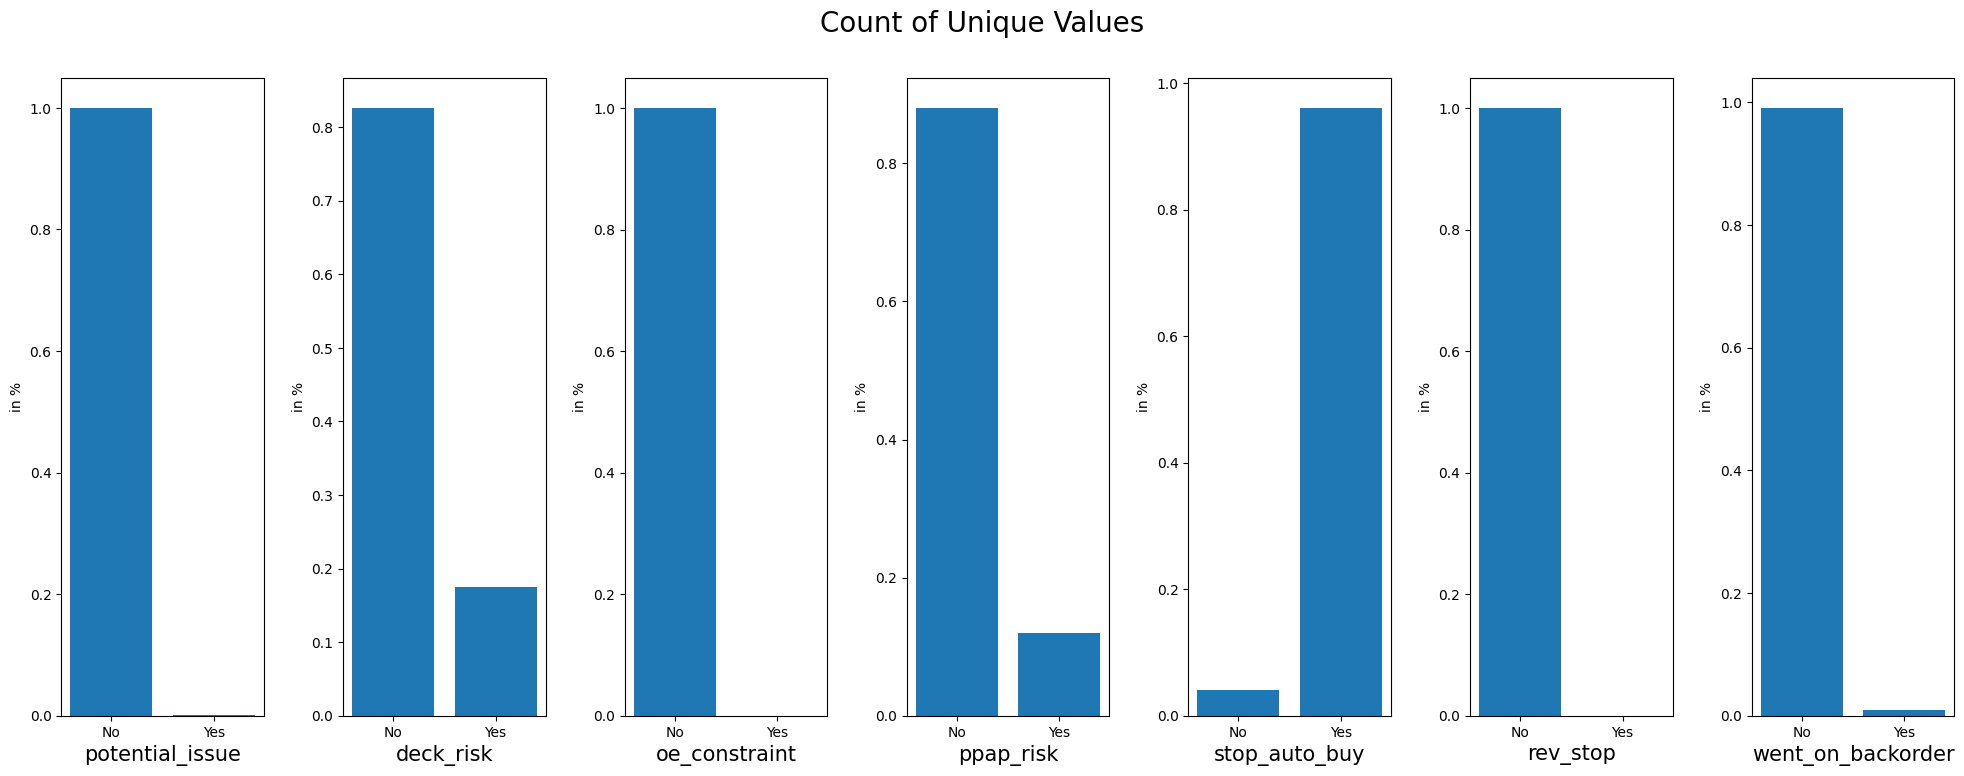

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=len(cat_cols), figsize=(20, 8))
fig.suptitle('Count of Unique Values', fontsize=20)

for i, col in enumerate(cat_cols):
    feature_counts = df[col].value_counts(True).sort_index()
    axes[i].bar(feature_counts.index, feature_counts.values)
    axes[i].set_xlabel(col, fontsize=15)
    axes[i].set_ylabel('in %')

plt.tight_layout(pad=2)  # Increase spacing between subplots
plt.show()

<Axes: xlabel='went_on_backorder', ylabel='in %'>

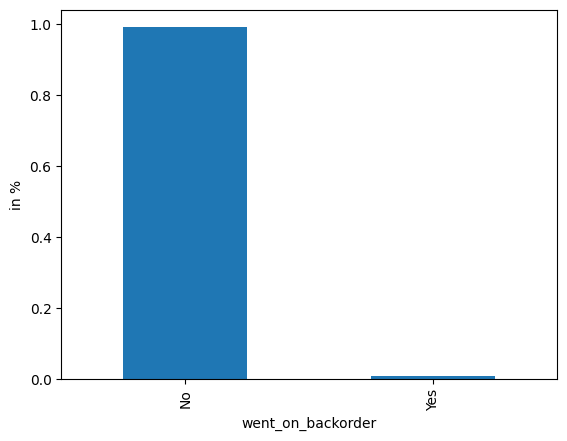

In [19]:
df['went_on_backorder'].value_counts(True).plot(kind='bar', ylabel='in %')

### The target feature has two unique values "Yes" which means the product will went_on_back_order and "NO" which means the product will not went_on_back_order 

### However, there is a lot of unbalance data, therefore, we need to handle unbalance data set using SMOTE technique

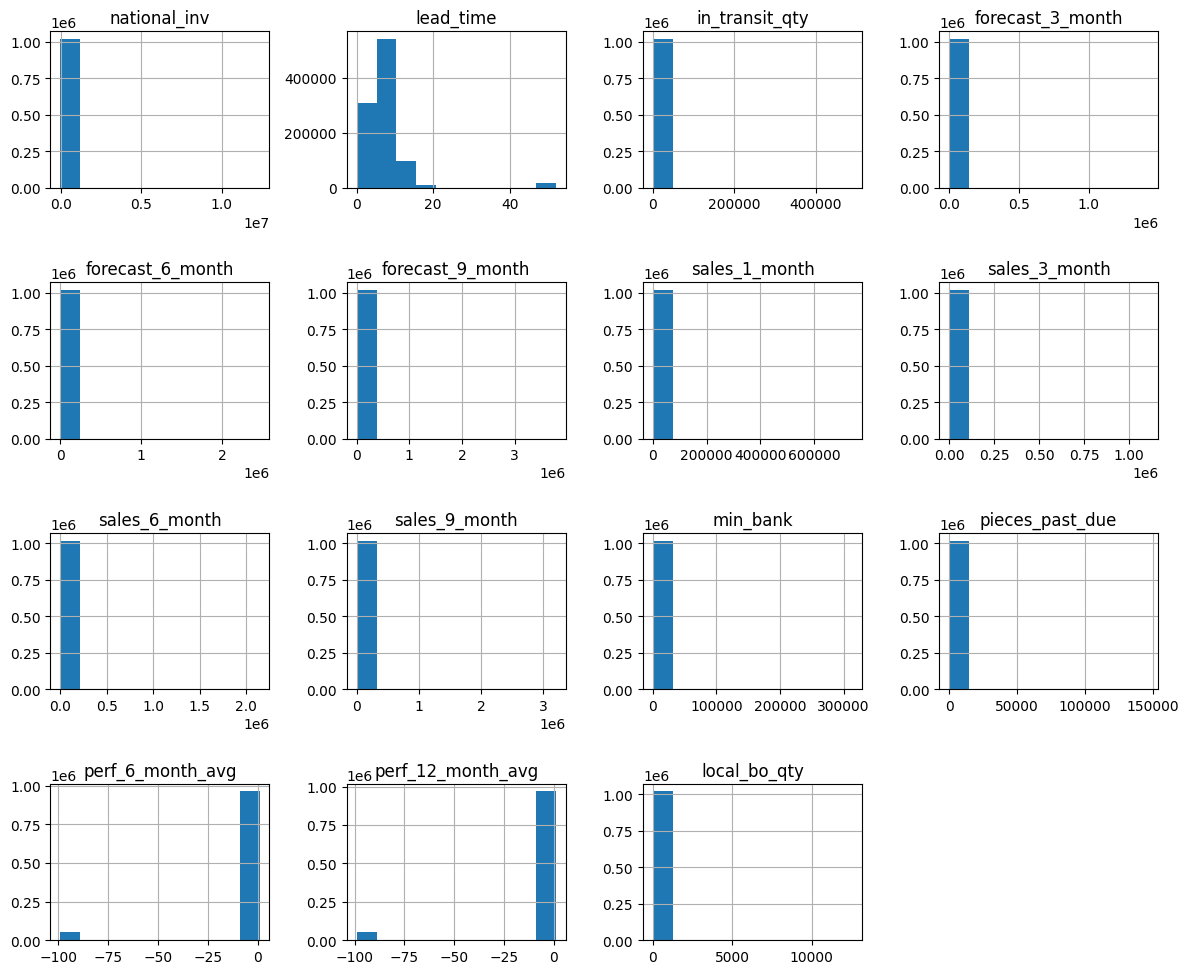

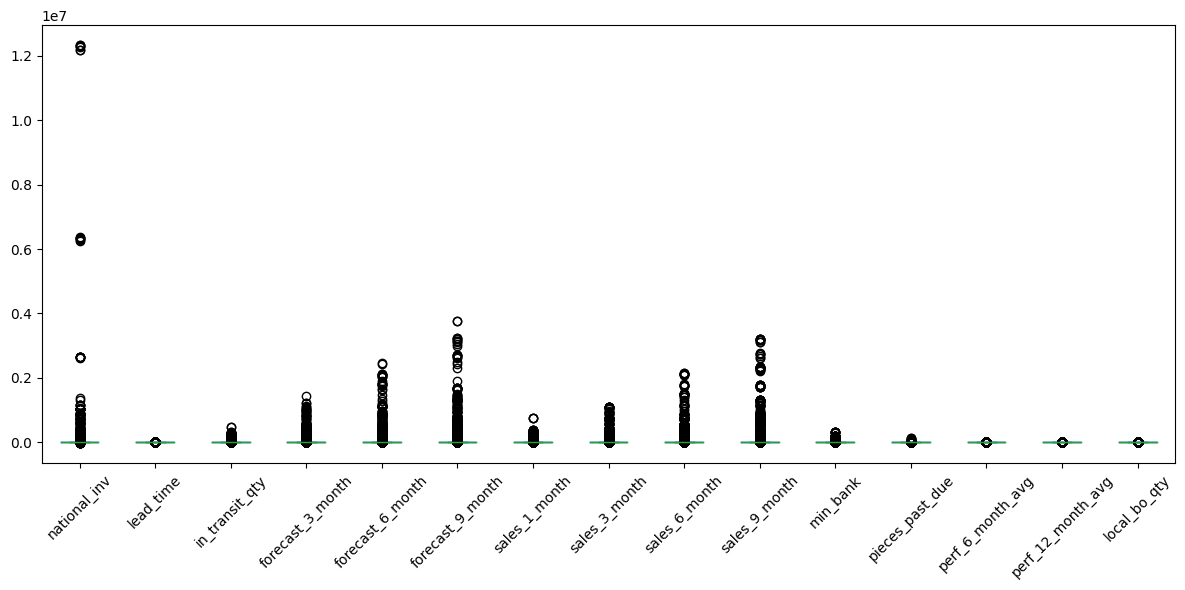

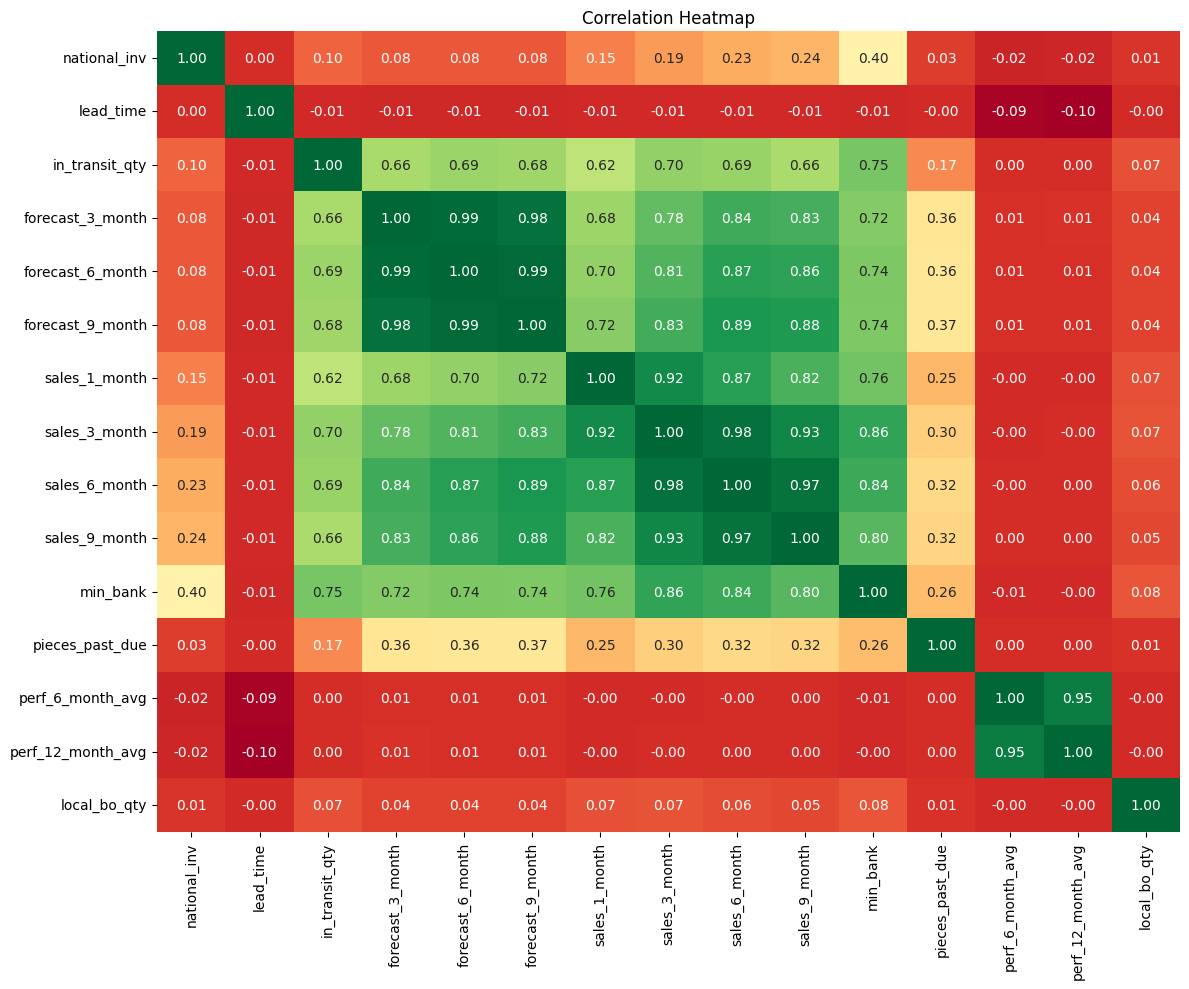

In [20]:
# Histograms
df[num_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box Plots
df[num_cols].plot.box(figsize=(12, 6))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', cbar=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

### We can drop some columns which have high correlation.
1. forecast_3_month show high correlation with forecast_6_month and forecast_9_month. We can drop forecast_6_month and forecast_9_month columns and keep only forecast_3_month column to get better output.

2. Similarly sales_1_month show high correlation with sales_3_month, sales_6_month and sales_9_month. We can drop sales_3_month, sales_6_month and sales_9_month columns and keep only sales_1_month column to get better result.

3. ANd finally perf_6_month_avg and perf_12_month_avg are correlation

In [21]:
drop_cols = ['forecast_6_month', 'forecast_9_month',
            'sales_3_month', 'sales_6_month', 'sales_9_month', 'perf_12_month_avg',]
df.drop(columns=drop_cols, inplace=True)

In [22]:
df.shape

(1020308, 16)

In [23]:
for i in drop_cols: num_cols.remove(i)
num_cols

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'sales_1_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'local_bo_qty']

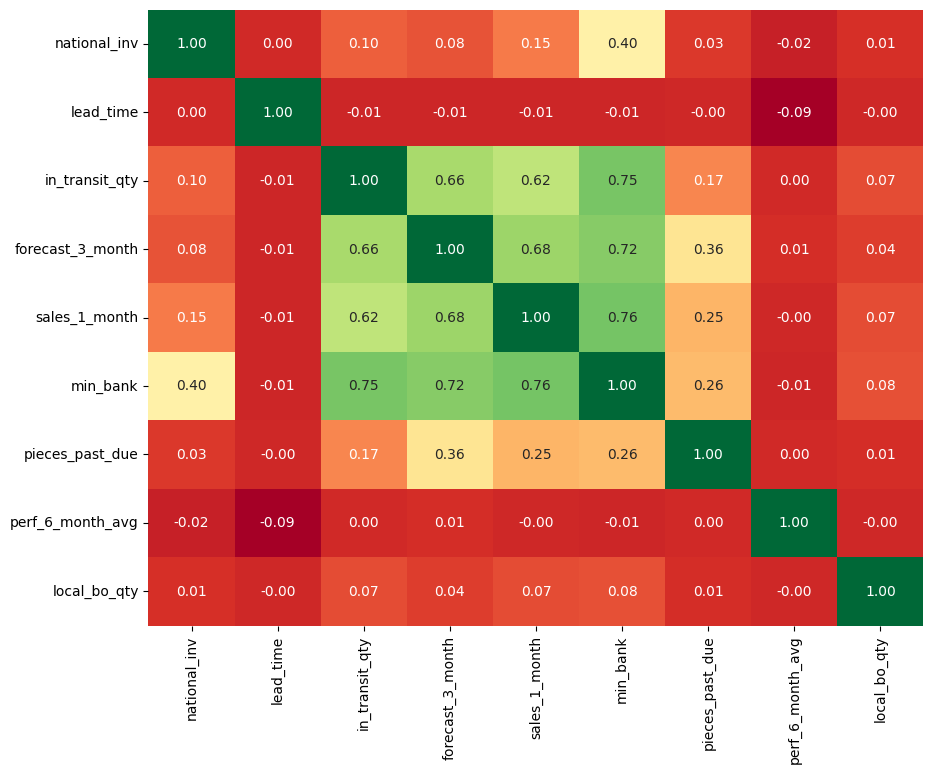

In [24]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='RdYlGn', fmt='.2f', cbar=False)
plt.show()


### Handling missing values of lead_time feature 

<Axes: ylabel='Frequency'>

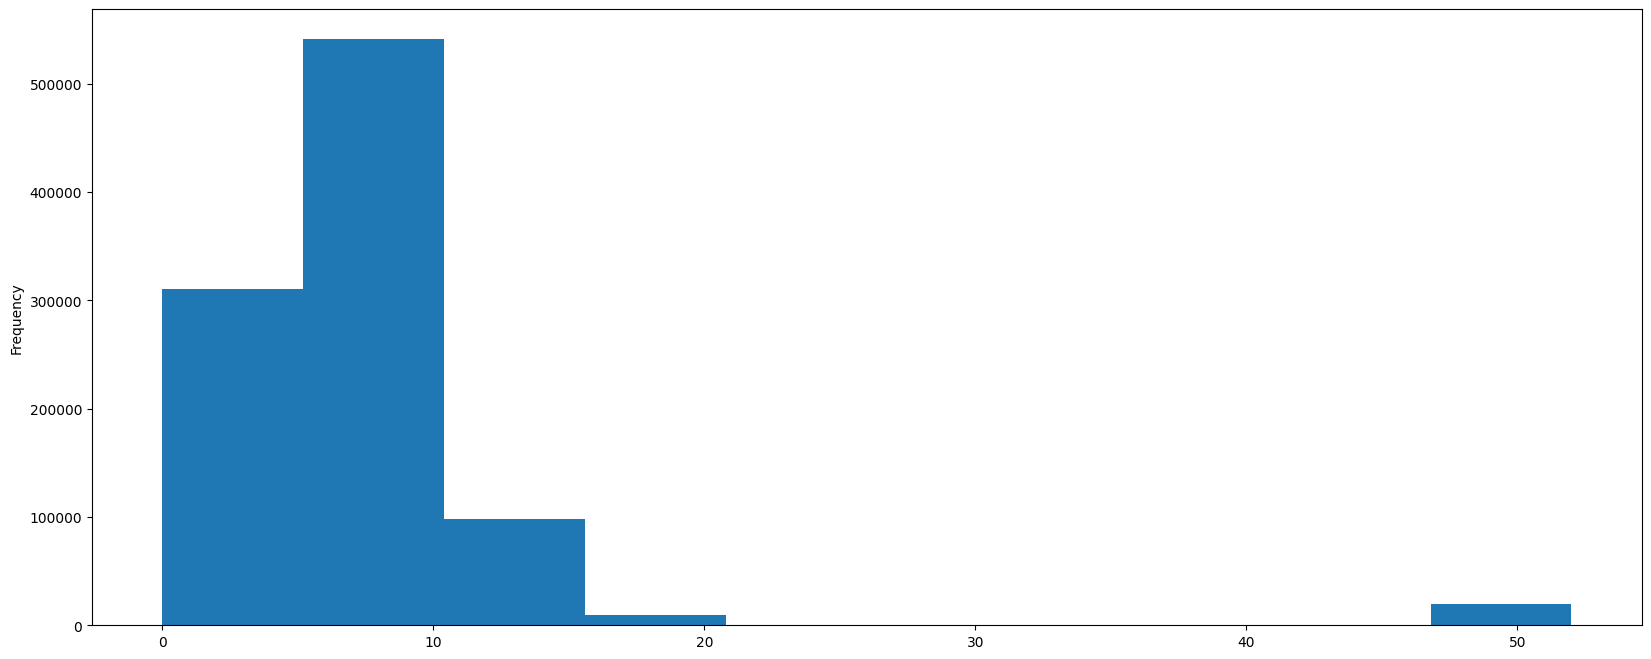

In [25]:
df['lead_time'].plot.hist(figsize=(20, 8))

<Axes: >

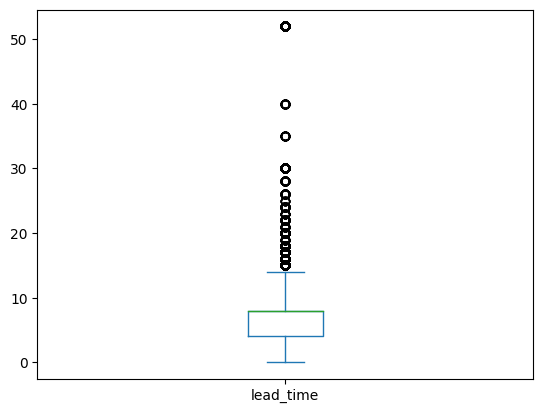

In [26]:
df['lead_time'].plot.box()

In [27]:
df['lead_time'] = df['lead_time'].fillna(df['lead_time'].median())

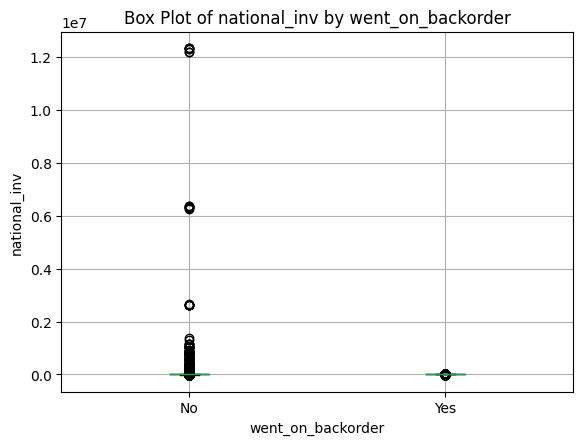

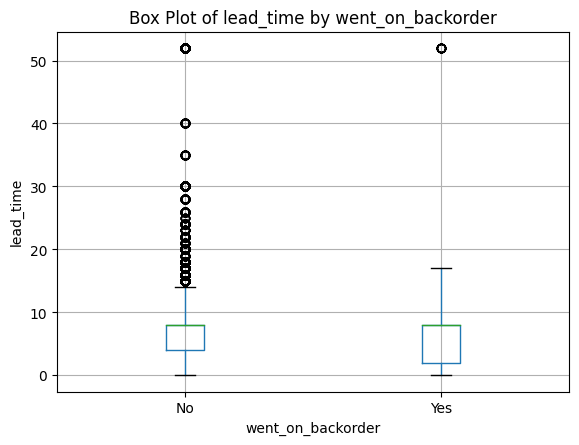

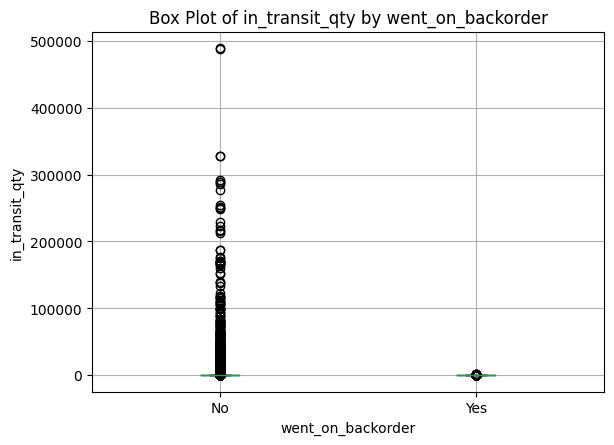

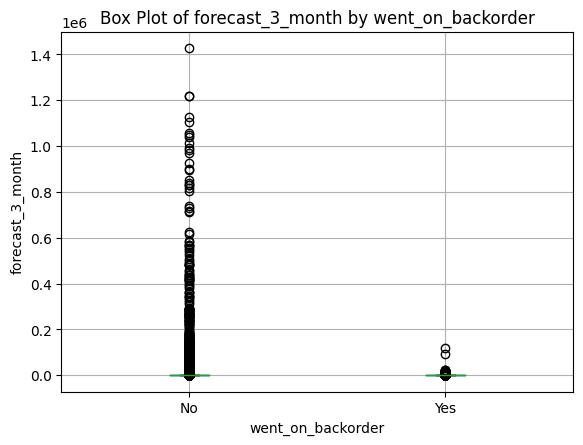

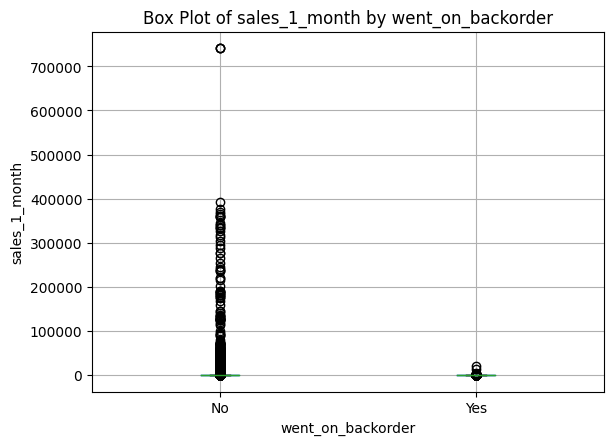

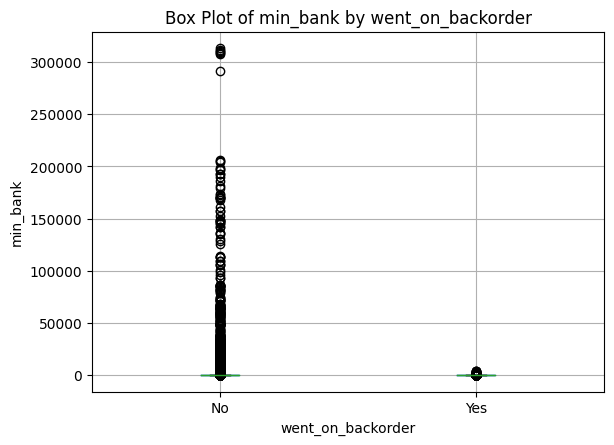

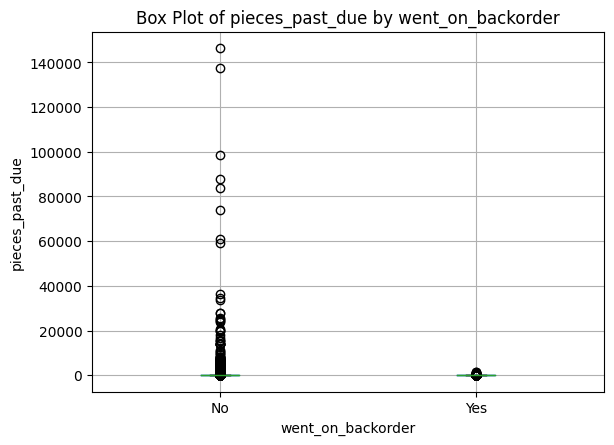

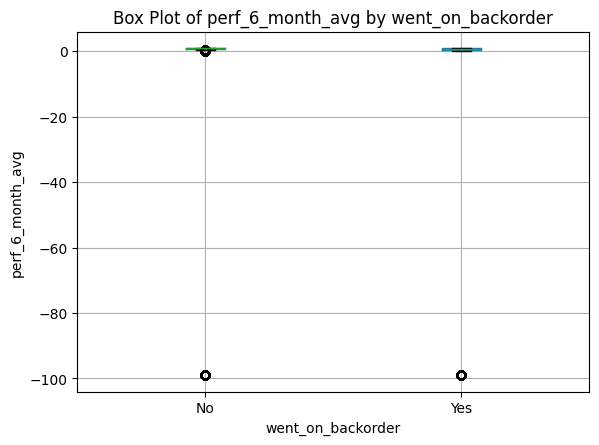

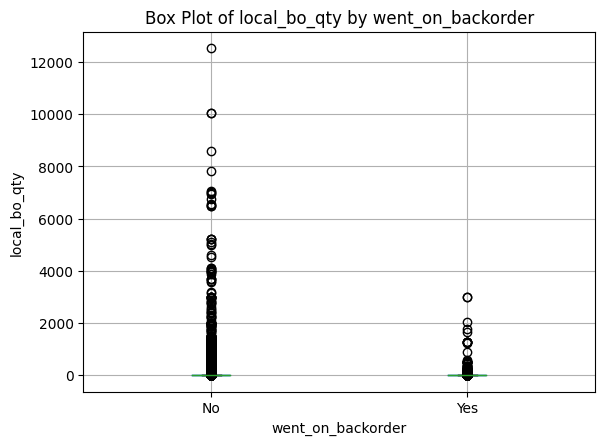

In [28]:
selected_features = ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'sales_1_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'local_bo_qty']

for feature in selected_features:
    df.boxplot(column=feature, by='went_on_backorder')
    plt.title(f'Box Plot of {feature} by went_on_backorder')
    plt.suptitle('')
    plt.xlabel('went_on_backorder')
    plt.ylabel(feature)
    plt.show()

In [ ]:
# from scipy import stats

# for feature in num_cols:
#     z_scores = np.abs(stats.zscore(df[feature]))
#     df = df[z_scores < 3]

In [ ]:
# for feature in num_cols:
#     Q1 = df[feature].quantile(0.25)
#     Q3 = df[feature].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [29]:
for col in num_cols:
    mini, maxi = df[col].quantile([0.5, 0.85])
    df[col] = df[col].clip(mini, maxi)

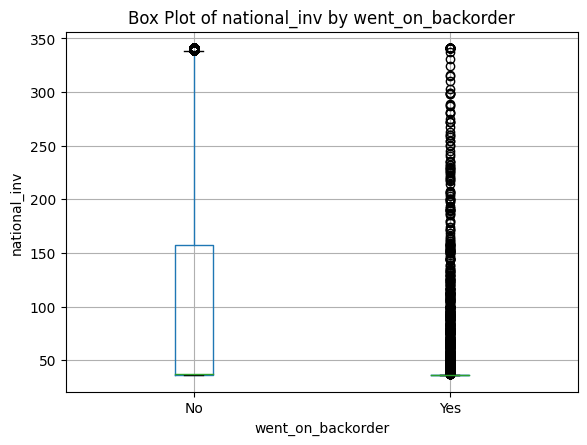

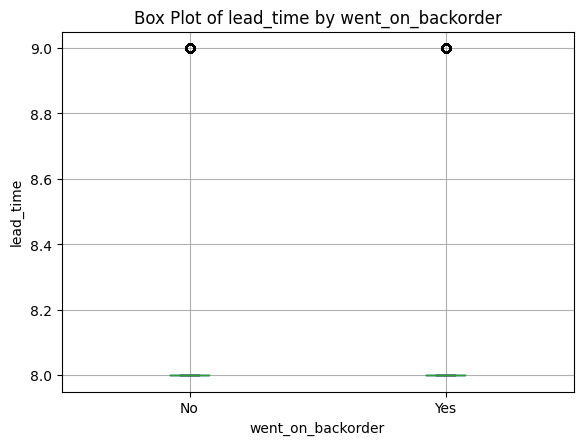

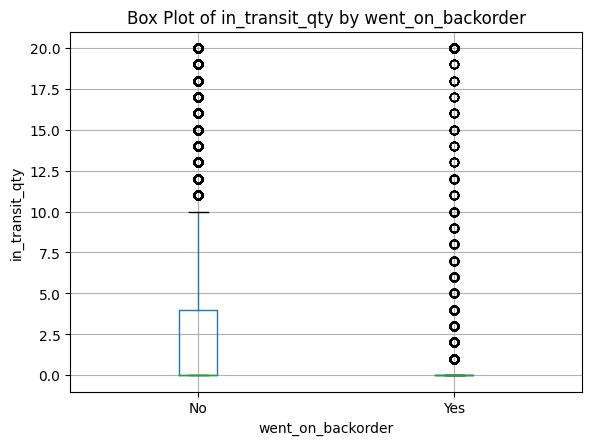

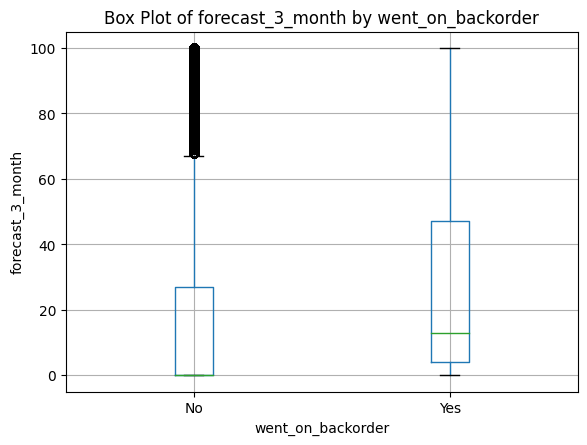

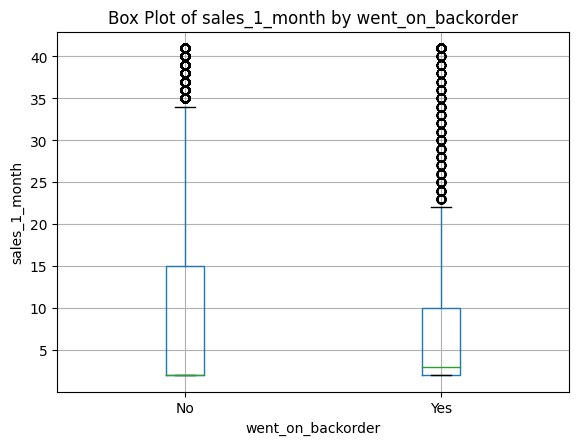

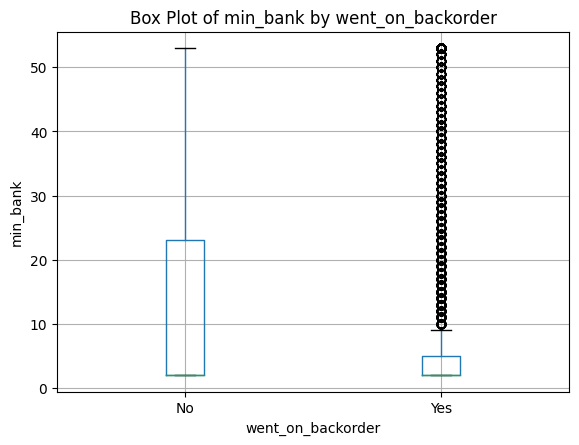

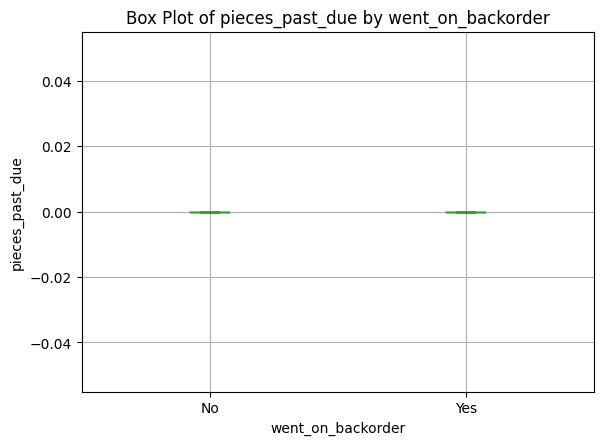

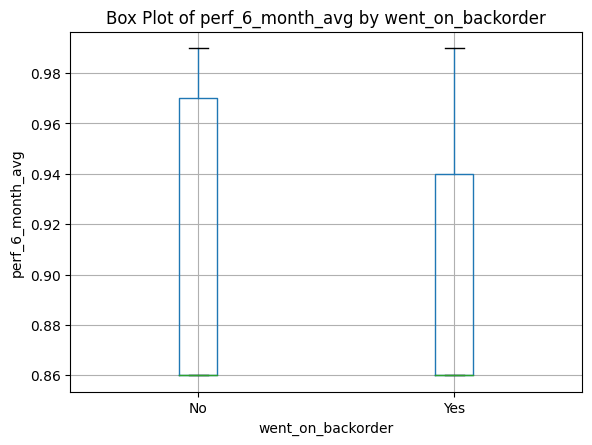

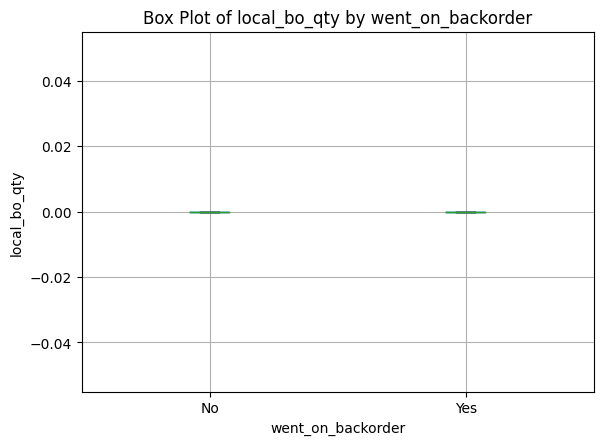

In [30]:
for feature in num_cols:
    df.boxplot(column=feature, by='went_on_backorder')
    plt.title(f'Box Plot of {feature} by went_on_backorder')
    plt.suptitle('')
    plt.xlabel('went_on_backorder')
    plt.ylabel(feature)
    plt.show()

In [31]:
df.to_csv('cleaned_data.csv', index=False)

In [32]:
df.shape

(1020308, 16)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

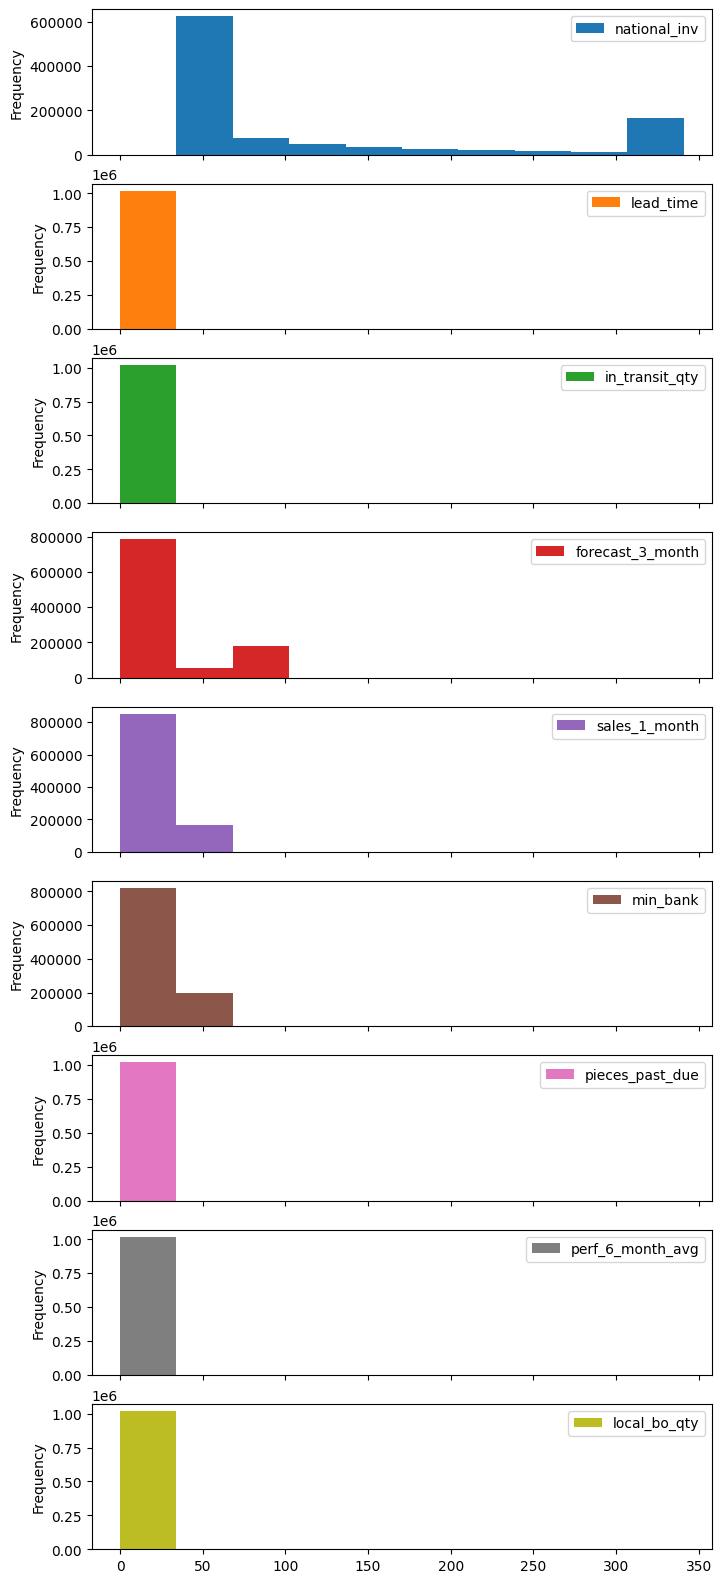

In [33]:
df[num_cols].plot.hist(subplots=True, figsize=(8, 20))